### Binarisation

106.68349692850646
152.9139119287712
161.9525370777492
162.95477706934918
163.05385733029965
163.16171161101187
163.16171161101187
[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]
[  0 255]


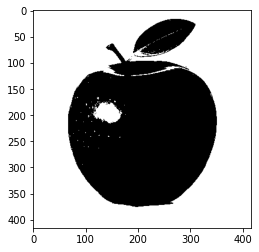

In [51]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
import random

img = cv.imread('apple.png')
img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

def binarisation(img, k):
    img_copy = img.copy()
    T1 = random.randint(0, 255)

    while True:
        # segment image by threshold T to G1 and G2
        G1 = img_copy[img_copy < T1]
        G2 = img_copy[img_copy >= T1]

        mean1 = np.mean(G1)
        mean2 = np.mean(G2)

        T = (mean1 + mean2) / 2
        T2 = T1 
        T1 = T
        print(T)
        if abs(T1 - T2) == k:
            break

    # segment image by threshold T to G1 and G2
    G1 = img_copy[img_copy < T]
    G2 = img_copy[img_copy >= T]

    # set all pixels in G1 to 0 and all pixels in G2 to 255
    img_copy[img_copy < T] = 0
    img_copy[img_copy >= T] = 255

    return img_copy

result = binarisation(img, 0)

print(result)
print(np.unique(result))

cv.imwrite('result.png', result)

plt.imshow(result, cmap='gray')
plt.show()

In [39]:
img = cv2.imread('apple.png')
pixel_values = img.reshape((-1, 3))

# convert to float
pixel_values = np.float32(pixel_values)

In [56]:
class KMeans():
    def __init__(self, k, max_iter=1000, random_state=42):
        self.k = k
        self.max_iter = max_iter
        self.random_state = random_state

    def initialize_centroids(self, X):
        np.random.RandomState(self.random_state)
        random_idx = np.random.permutation(X.shape[0])

        centroids = X[random_idx[:self.k]]
        return centroids

    def compute_centroids(self, X, labels):
        centroids = np.zeros((self.k, X.shape[1]))
        for k in range(self.k):
            centroids[k, :] = np.mean(X[labels == k, :], axis=0)
        return centroids

    def compute_distance(self, X, centroids):
        distance = np.zeros((X.shape[0], self.k))
        for k in range(self.k):
            row_norm = np.linalg.norm(X - centroids[k, :], axis=1)
            distance[:, k] = np.square(row_norm)
        return distance

    def find_closest_cluster(self, distance):
        return np.argmin(distance, axis=1)

    def fit(self, X):
        self.X = X
        self.centroids = self.initialize_centroids(self.X)
        for i in range(self.max_iter):
            old_centroids = self.centroids
            distance = self.compute_distance(self.X, old_centroids)
            self.labels = self.find_closest_cluster(distance)
            self.centroids = self.compute_centroids(self.X, self.labels)

    def classify(self):
        distance = self.compute_distance(self.X, self.centroids)
        centroid_idx = self.find_closest_cluster(distance)
        return centroid_idx


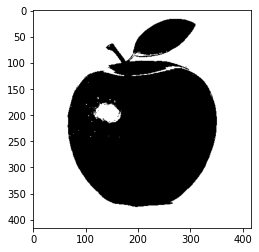

In [69]:
kmeans = KMeans(2, max_iter=30)
kmeans.fit(pixel_values)

a = kmeans.classify()

a = a.reshape(img.shape[0], img.shape[1])
plt.imshow(a, cmap='gray')
plt.show()
